In [1]:
%matplotlib inline
from mcupy.graph import *
from mcupy.utils import *
from mcupy.jagsparser import *
from mcupy.nodes import *
import scipy
import seaborn
import pylab

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data=parseJagsDataFile('data6.2.2.dat.R')

In [3]:
obserr=data['obserr']
obsH0=data['obsH0']

In [4]:
g=Graph()
p=FixedUniformNode(1e-6,1-1e-6).withTag('p')
phi1=ConstNode(1).withTag('phi1')
phi2=FixedUniformNode(1,50).withTag('phi2')
H0=FixedUniformNode(30,200).withTag('H0')
for i in range(0,len(obsH0)):
    b=BernNode(p).inGroup('b')
    err=CondNode(b,phi1,phi2)*ConstNode(obserr[i])
    err.inGroup("err")
    obsH0Node=NormalNode(H0,err).withObservedValue(obsH0[i])
    obsH0Node.inGroup('obsH0')
    g.addNode(obsH0Node)

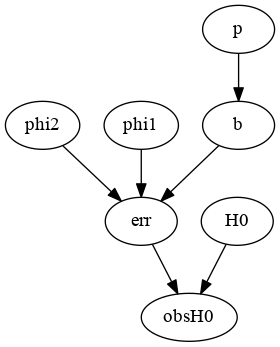

In [5]:
display_graph(g)

In [6]:
for i in log_progress(range(0,1000)):
    g.sample()
    
results=[]
monP=g.getMonitor(p)
monH0=g.getMonitor(H0)
monPhi2=g.getMonitor(phi2)
for i in log_progress(range(0,10000)):
    g.sample()
    results.append([monP.get(),monH0.get(),monPhi2.get()])

In [7]:
results=scipy.array(results)

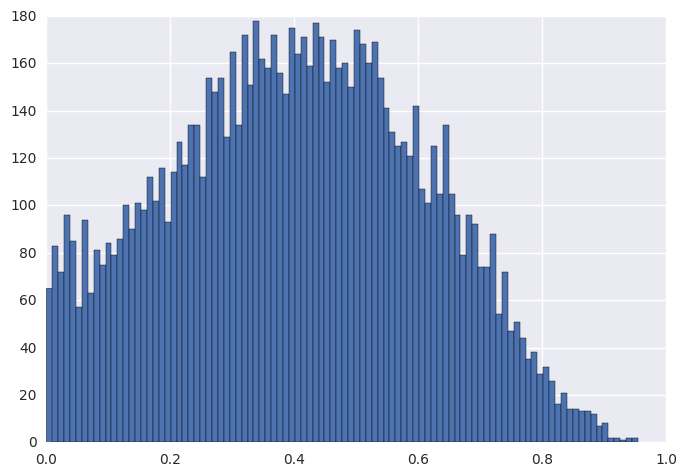

In [8]:
dummy=pylab.hist(results[:,0],bins=100)

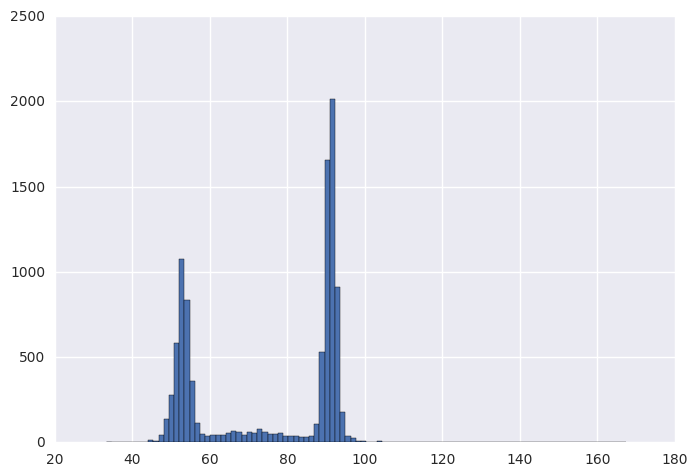

In [9]:
dummy=pylab.hist(results[:,1],bins=100)

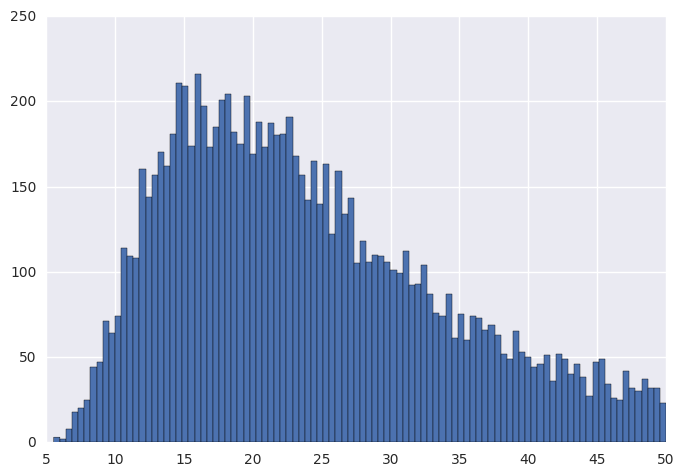

In [10]:
dummy=pylab.hist(results[:,2],bins=100)

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


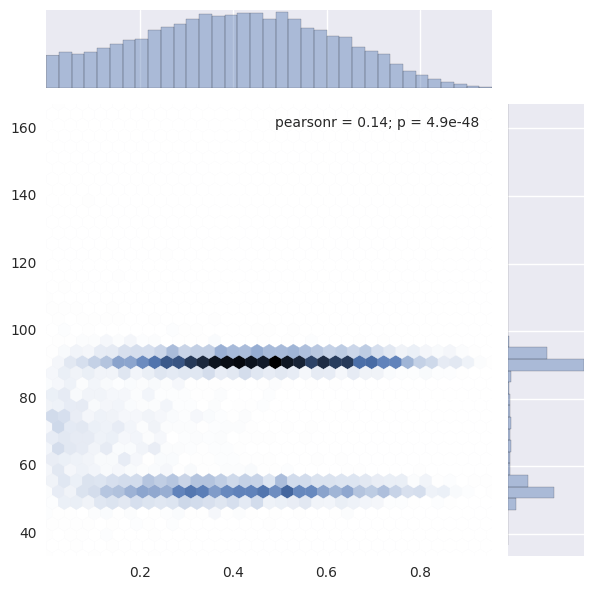

In [11]:
seaborn.jointplot(results[:,0],results[:,1],kind='hex')

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


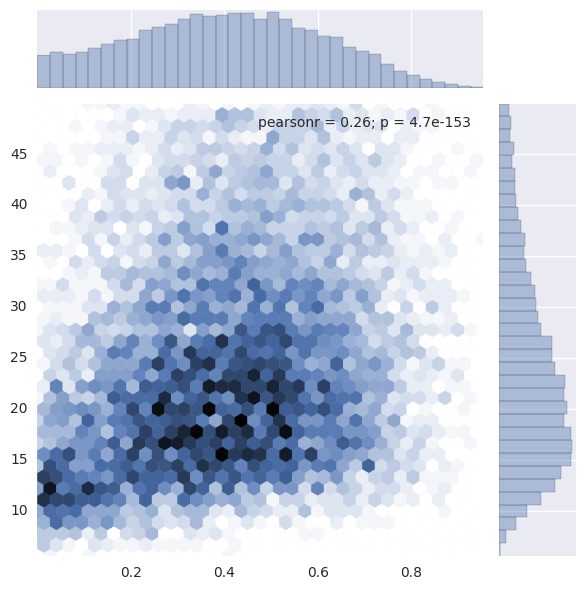

In [12]:
seaborn.jointplot(results[:,0],results[:,2],kind='hex')

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


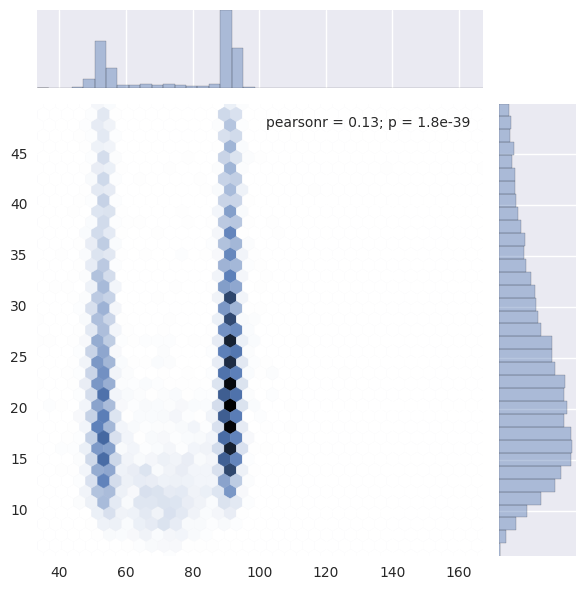

In [13]:
seaborn.jointplot(results[:,1],results[:,2],kind='hex')